# ___Logistic Regression___
--------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# let's revisit the tumor classification example!

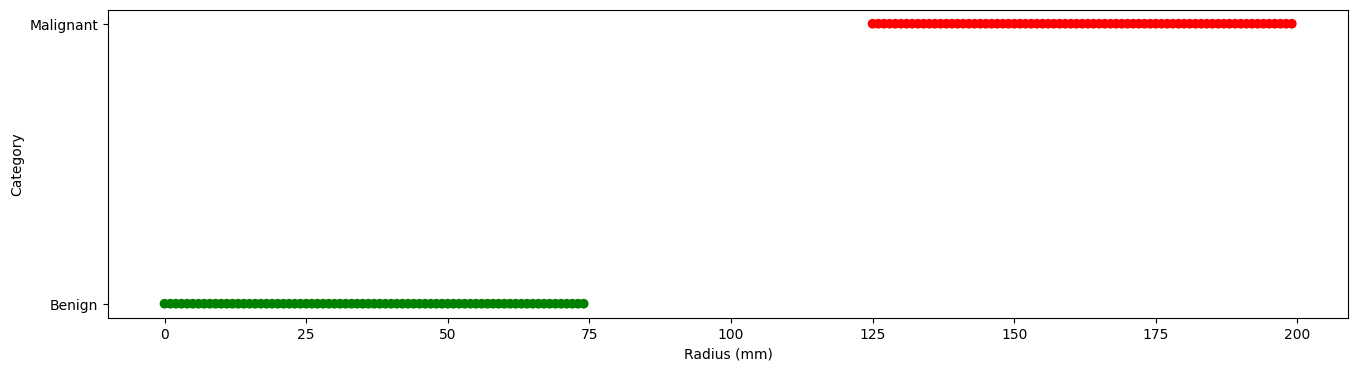

In [18]:
fig, axes = plt.subplots()
fig.set_size_inches(16, 4)
x = np.arange(0, 200)
axes.scatter(x, np.repeat([0, np.nan, 1], [75, 50, x.size - 125]), c = np.repeat(['g', 'r'], [75, x.size - 75]))
axes.set_xlabel("Radius (mm)")
axes.set_ylabel("Category")
axes.set_yticks([0, 1], labels = ["Benign", "Malignant"])
plt.show()

In [19]:
# Logistic regression will fit an S shaped sigmoid curve to this data
# a sigmoid function f(x) is given by

# ___$f(x) = \frac{1}{1+e^{-x}}$___

In [21]:
def sigmoid(x: np.float32) -> np.float32:
    """
    
    """
    return 1.00 / (1.00 + np.power(np.e, -x))

sigmoidv = np.vectorize(sigmoid)

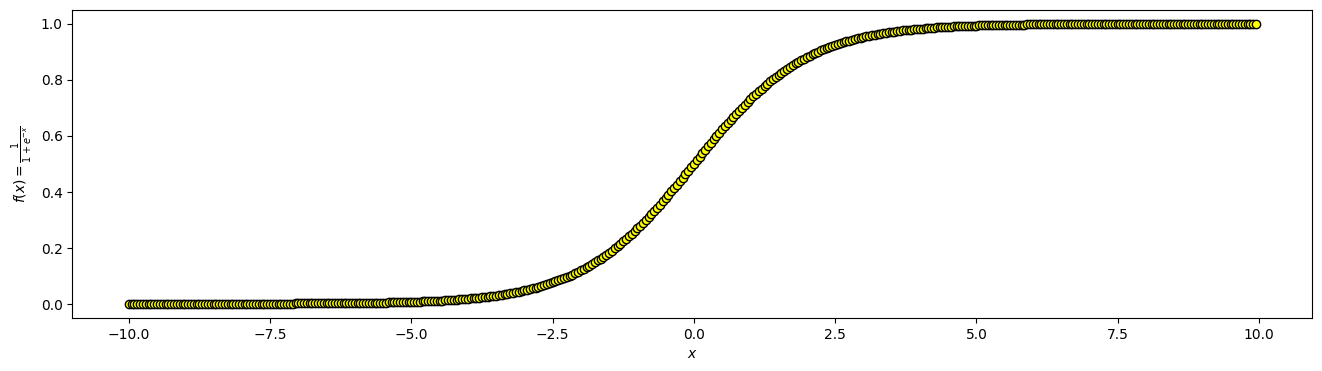

In [33]:
fig, axes = plt.subplots()
fig.set_size_inches(16, 4)

x = np.arange(-10, 10, step = 0.05)
axes.scatter(x, sigmoidv(x), color = "yellow", edgecolor = "black")
axes.set_xlabel("$x$")
axes.set_ylabel(r"$f(x) = \frac{1}{1+e^{-x}}$")

plt.show()

In [40]:
# for the sigmoid function, as x increases, e^-x will decrease exponentially
# hence 1 + e^-x will become almost equal to 1
# sigmoid function will then be equal to 1 / 1 = 1.00

# when x is small, e^-x will be quite large

In [49]:
[np.power(np.e, x) for x in (0.0001, 0.001, 0.1, 1, 10, 100, 110)]

[1.0001000050001667,
 1.0010005001667084,
 1.1051709180756477,
 2.718281828459045,
 22026.465794806703,
 2.6881171418161212e+43,
 5.920972027664636e+47]

In [50]:
# in such contexts, the subexpression 1 + e^-x will evaluate to large value
# this 1 / 1 + e^-x will become negligibly small, hence can be considered 0.000

In [51]:
# this is why sigmoid function plateus out at the beginning and the end

In [52]:
# a multiple linear regression mode is defined as

# ___$f_{\overrightarrow{w},b}(\overrightarrow{x}) = \overrightarrow{w} \cdot \overrightarrow{x} + b$___

In [54]:
# multiple logistic regression just introduces another step downstream!

# ___$f_{\overrightarrow{w},b}(\overrightarrow{x}) = s(\overrightarrow{w} \cdot \overrightarrow{x} + b)$___
# ___$f_{\overrightarrow{w},b}(\overrightarrow{x}) = \frac{1}{1+e^{(\overrightarrow{w} \cdot \overrightarrow{x} + b)}}$___

In [57]:
# where s is the sigmoid function
# what happens is the output (predictions) of multiple linear resression gets transmuted by a sigmoid function
# we ultimately get results in the range 0 to 1

In [59]:
# interpreting the output of a logistic regression model
# one could think of logistic regression model's output as the probability of the predicate being true
# e.g.

def predicate(x: np.float32) -> np.uint32:
    THRESHOLD: np.float32 = 0.550000
    return 1 if x >= THRESHOLD else 0

predicatev = np.vectorize(predicate)

In [65]:
linreg_preds = np.random.rand(100)

In [66]:
# there you go :)

predicatev(linreg_preds)

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1])

In [67]:
# so far, we have only discussed binary multiple logistic classification models!